In [1]:
import numpy as np
import os
import time
import matplotlib.pyplot as plt
from tqdm import tqdm

from Feng_Doolittle import algorithm

In [2]:
def synthetic_gen(sequence_length, num_sequences):
    dictionary = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
    sequences = []
    for _ in range(num_sequences):
        seq_len = np.random.randint(int(0.8*sequence_length), int(1.2*sequence_length))
        sequences.append(''.join(np.random.choice(dictionary, seq_len)))
        
    return sequences

def compute_sp(sequences, score_mat, dictionary):
    score = 0
    n = len(sequences)
    for i in range(n):
        for j in range(i+1, n):
            for k in range(len(sequences[i])):
                score += score_mat[dictionary.index(sequences[i][k]), dictionary.index(sequences[j][k])]
    score = score / (n * len(sequences[0]))
    
    return score

In [3]:
dictionary = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ-#'
len_dict = len(dictionary)
score_mat = np.zeros((len_dict, len_dict))
for i in range(len_dict):
    for j in range(len_dict):
        if i == j:
            score_mat[i, j] = 1
        else:
            score_mat[i, j] = -1

ind = dictionary.index('-')
score_mat[ind, ind] = 0

msa = algorithm.MSA(dictionary, score_mat)

### Test on synthetic data, with respect to number of sequences

In [7]:
# With respect to the number of sequences, choose length of sequences = 10

times = []
scores = []

for num_seq in tqdm(range(5, 51, 5)):
    time_samples = []
    score_samples = []
    gen_sequences = synthetic_gen(10, num_seq)
    for _ in range(20):
        start = time.time()
        # replace
        alignment = msa.compute_msa(gen_sequences)
        # replace
        end = time.time()
        time_samples.append(end-start)
        score_samples.append(compute_sp(alignment, score_mat, dictionary))
    times.append(time_samples)
    scores.append(score_samples)

100%|██████████| 10/10 [06:36<00:00, 39.70s/it]


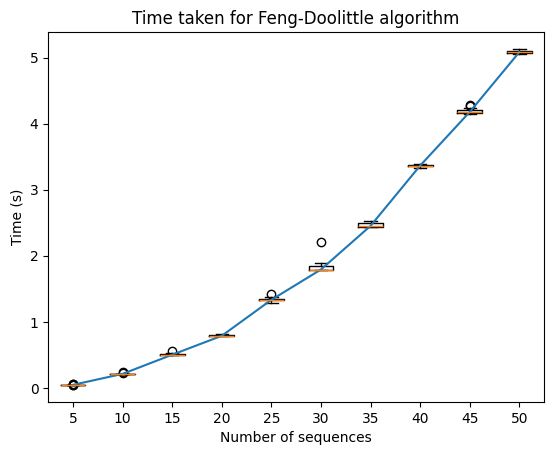

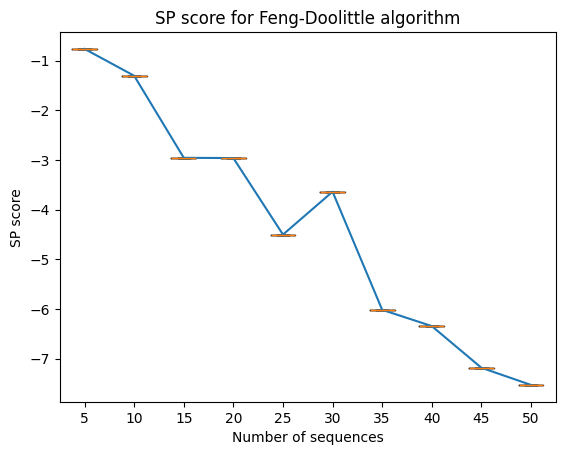

In [8]:
# Box plot of times
plt.boxplot(times)
plt.plot(range(1, 11), [np.median(samples) for samples in times])
plt.xlabel('Number of sequences')
plt.ylabel('Time (s)')
plt.title('Time taken for Feng-Doolittle algorithm')
plt.xticks(ticks=range(1, 11), labels=[str(i*5) for i in range(1, 11)])
plt.show()


# Box plot of sp scores
plt.boxplot(scores)
plt.plot(range(1, 11), [np.median(samples) for samples in scores])
plt.xlabel('Number of sequences')
plt.ylabel('SP score')
plt.title('SP score for Feng-Doolittle algorithm')
plt.xticks(ticks=range(1, 11), labels=[str(i*5) for i in range(1, 11)])
plt.show()

### Test on synthetic data, with respect to legnths of sequences

In [9]:
# With respect to the number of sequences, choose length of sequences = 10

times = []
scores = []

for seq_len in tqdm(range(5, 51, 5)):
    time_samples = []
    score_samples = []
    gen_sequences = synthetic_gen(seq_len, 10)
    for _ in range(20):
        start = time.time()
        # replace
        alignment = msa.compute_msa(gen_sequences)
        # replace
        end = time.time()
        time_samples.append(end-start)
        score_samples.append(compute_sp(alignment, score_mat, dictionary))
    times.append(time_samples)
    scores.append(score_samples)

100%|██████████| 10/10 [06:20<00:00, 38.08s/it]


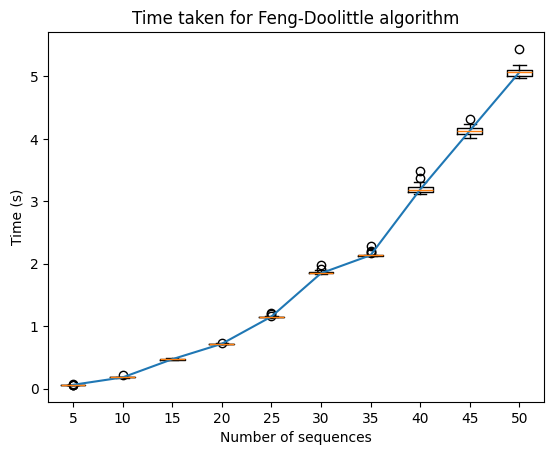

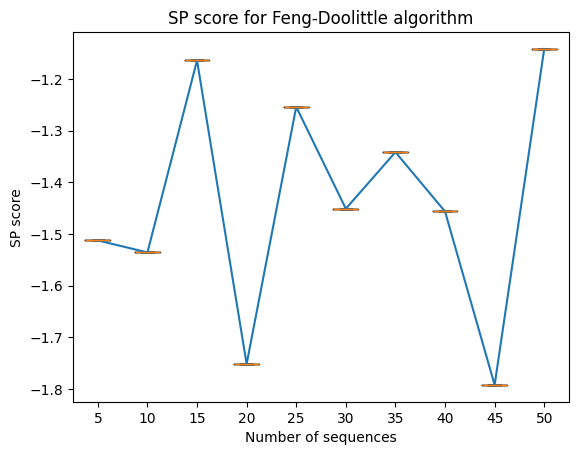

In [10]:
# Box plot of times
plt.boxplot(times)
plt.plot(range(1, 11), [np.median(samples) for samples in times])
plt.xlabel('Number of sequences')
plt.ylabel('Time (s)')
plt.title('Time taken for Feng-Doolittle algorithm')
plt.xticks(ticks=range(1, 11), labels=[str(i*5) for i in range(1, 11)])
plt.show()


# Box plot of sp scores
plt.boxplot(scores)
plt.plot(range(1, 11), [np.median(samples) for samples in scores])
plt.xlabel('Number of sequences')
plt.ylabel('SP score')
plt.title('SP score for Feng-Doolittle algorithm')
plt.xticks(ticks=range(1, 11), labels=[str(i*5) for i in range(1, 11)])
plt.show()

### Show results on real data

In [11]:
raw_real_data = [
    'QAEAQPLSAYTSFQNQFMVWDNGMIRKVEYLVPLQVGIGRSAIPYIDNSRNFKIYYQGASRKVNDGFTQA..FQVTDNIVTYQNSKALFVWERGNTTNLSKYCE.QFYIGDSLVVFFDGVQREFRAYYDGRIFPIEGFLAGNSVSNIFDTSTTSIRNSMDISSGQLPSIKVSDNIAAYVNYANQFRIFYHGEIVEQENYLVNS..FDVGRNNVAYVD.ANREFKIFSNGKTTTIDNFPPYTYTAGDNVVAYVGYDNYFKIYYNDSLYTIGYFQ.PD.FVVKDNVVAFQDATGYFKVFYKGQIYTLESYYPTDFKAGYNSVAYVNRANVLRLFTEGDIYDVTNADVATWRLDYDVIQYRFGANMFKVFYKGKTY',
    'SKVNAQLSAYTNFQNQFMVFDNAIIRKIEYLVPIQYKVGRIAIPYLDNSRNFKIYYNGGSTKINDGFTSN..FQVTDNLLTYQNAKALWVWDKGSVMNLSKYCD.QFYTGDSVVLFFEGVQKEFKAYYNGEIYPIENFLAATSSDLFSQDTTVVISNEMDIASGALPSIKVSDNIAAYVNYADQFRIFYHGAIVEQENNLVTS..FDVGRNTTAYVD.INKTFKIFHGGKTTKVDEFQPYSYSAGDDVVAFVGYDNYFKIFYQDSVYNIGYFQ.PD.FRVKDNVVAFQDATGYFKVFYKGTIYTLESYYPADFKVAYNSVVYKNRSNVLRLFSDGNIYDVTSADITDWRLDYDVLQYRFGANMYKVFYKGQTY',
    'KAWAQPVSAYTNFQNQFMVWDNGIERKIESLLPVRYEIGRVAVPYLDNTRNFKIYSKGGVQLINQGFTSD..FKVTDNLVAYRNNNALFVWENGTTTRLSNYIS.TYTVGDSVVLFFDNVRSVYKAYYGGNLYEIESFLGGGNNMT...VDSNAVNDGLSIADGQLPSVKVSDNIAAFITYANRFKVFYHGETTELETFTVTS..FDVGRNIVAYVD.ANRNFKVFYNGEVNEIESFTPASYKAGDNVMAYISNDGNFKIFYNGEVNTVGYFS.PE.YKVGDNIVAYKDASGYFKVFYKGKIYTLDAYYPQSYKISYNSLAYVNAAGMLRLFSEGEVYDVTNASTADWRLDYDVIQYRFGQNMYKIFYKGKTH',
    'LLQAQGIASFTDKFGRFYVFDRGIIQTLEPRQVTNVQLGGDYLIYVDALSQV.IFYRNGKKQILNYMPQIELYKPTRYFMVSVEGGVLKVIEDEKKRDLALGANIVYAYGDSIVAFLD.FDRFLKVYYHNAVYE....ATNEPVSE......................FKASDNSIAYITEGENFFLVFNGETTLIDNAPPNE..YRLGNNFVAYLNRFNELY.VYDAGNRQQLETLPPLSYKAGDNLLAYVNNLNGFEVYWNGEVTELLPVA.PRQYEIFDNTLMYIDERGFLNVFFEGKNQTLEAYTPPAFAMFNGIVAYTNLDGKLFAFYDGKKITVSDQIVENFSVQGRVIQYQILNGEARFYYNGEHY',
    'ASWAQAVNAVTVQPNKLYYFNKGNCNIIEFQQISNLLMGFHYVTYTDRRGDVMVCYEGEKTRLTQGETN...IIMTNNHLVYQLASVLRVFDRGESTILSSFVS.GFAVGDSIVMFQDKIGGNLKYYYRGNIVEFSQVVGDYMFDP......................GAIGDNLFAFRETGGNYKAFYQNQYYNLTATNQDIT.FSAGMNMIAFNDYANYSFAVFDHGEVLDLENQYAKQYKAGHDFVYYQDNSGVNKVYYNNEIQELG.YE.LQEIAVYDSLIFFKE.ADYAKVWYQGEVFTIYNDIVKNYQVSGGSIAYMNSSNGVNALIRGVKTEITRQKVQSFTLNGNTVSLVFTPSSFAVWWNGKRF',
    'VAKPDGLALIEDDQNRLFIFDKGNFNQVEHNKVLQKHIGSDFVAYIDYMNDLKVYYNGKLTEVAESINS...FVASEDLIAWKISNYLYVWQDGITKQISRDVR.MMKTKGEILFFEDDFDNALKIYYKHKVYLFAQNHYSLQTKA......................LDIGRESLAVLDGDDQLFVFSKGDMHVQKFTQQRIL.FSAGGDGILVKNFDTGALEFISGEDIQTLEYFPPTWFKTRYNWQVWIDQSGNFN.YWDGTGKELLTYQKPRLIEYSPEYLLYEN.GNQLYSMHNGTETYVCDYIPEVYQFYNNYFVFYNRQRQVELVDNGHSKVISTMPEVSFDLYFDVIVLREGRKR.RVYYNGKIY',
    'FAQKQTVFAYMDYNNFFHSFKDGYFNQVDHQAVSGLVMGDEVLAYYNNQRDFKI.YDGTFARVMTNQPAA..FKVSDHMAAWNIGQLLFYYENGKPHNMTSFGG.NYWVTDSIIAFQDTRYNSLNVVYQGKITTLVQSTMDLPEPV.......................VQGDNLIVFKDNGDVYKVFYRGQIYDLGTYNGTDFEFFPGTDILAFNDPQTRTFAVFQDGEFVDVEEFRSPKVKAGRGFVAYEDLQGNLKYYGKGKYETLSSY..PQFWDAKDDLVAWGD.ANSTYQYYKGEKKNLANFVVKDWRMKNDVFAFRTLMGGVAASVAGVYKEITTINNTDYYINGHGVMVTLPNRSVMVLWNGQIY',
    'ALNAQGLFPFLDNIGYLRSFENGYSKQLDYLPPTEYKYNQNLIVFRDHKRDLFV.YDGKKKHFLNNTAVR..YELGLNSVTWNIGPILFHWENGRRKTLSNFAD.YYAVSDSLVVFIDSRDNSIKAHYKDSIYLVTYSLEELTLPQ.......................NIGPTTFGFKGPGEVQYIFDRGKITEIGSSQFSFS.YASGYGFSVFNDPINQSFALYENGEIFNIEAVQIPSYKAGNNFAVYLDQNRNLMYYEDGDLKKISNYS.PDFYEVKDSIVVWGE.TNLFFMYDGEQVTQICNYIPEEYKLSNKTVAFRNVMGGVSVCNYGTTKEVTKVFKAEFDVNANIVRVETSKGNFLFYQNGKSY',
    'QLNAQRVFPLLDNRDYFKSFHEGQTRQLDHLKPIDYKYSEELIAFIDNKRDLFV.YDGKTNEKLTGLAND..YKIGINLVAWNTGPVVSVWDNGRIYDLTLFGR.NYEVSDSLVVFEDLRDNVIRVYYKGEIHDLFYSISDLYFPQ.......................TIGSNTVAFRGNGNVHYAFIRGEIIELGVFNEAIN.FAAGANLVTFNDPFNQSFAVAFQDEVLDVEPTMVMNYKAGYDQFVYTDRNNNLKAYIDGELITLSSY..PQFYEVFRTMVVWGE.NGVLYTYNNGTRYEIANYIPDEYKIREGIVAFRNLNGGVSVFHNNEVEIVSNLSGAPFEVNGNTVRVQVNKGNYVFFKNGFTY',
    'KLNSQSVFPLIDNREYFKSFHEGQTRQLDFLKPIDYKYSEEIIAYIDSKSDLYV.YDGRKSEKLSGLAND..YKIGINLLAWNAGPILSMWDNGEKQTLTRFAG.RYVVSDSLIVYEDRRENAIKVYYRGEVHDLYYSVSDVHLPQ.......................YIGSNTVAFTGNGNVNYAFVGGKIIEIGVFNEHIA.YATGANLVAFNDPFNQTFAVAFQNEVLDIEPTMVQSYKTGYDQIVYLDRNENLKALIRGEIVELSTY..ASFYEIFRDLIVWGE.NGVFYAYYKGKRYEVANYIPQEYKLRDGIVAFRNLNGGVSVFHNNEVEIISNLSGAPFEVNGNTVRVQVNKGNYVFFKNGFTY',
    'SGWAQPLSAYVDIQRQFQVWDAGMLRKADYLQPVEYKIGRTTIPFLDNSRSFKIYYRGGVQKINDGFTQQ..FFTTDNLIAFLNAKSLNVFDRGTIKNLSILCD.QYYVGDSIVLFKDGVRSEYKVYYDGQITPVENFLAQDAITT......................AQVSDNVAAYVNFANQFRIFWTGQLFKQEDYAVQS..FGVGRNTVAYID.ANRRFRVFHAGQTFTLDTYAPQSYTTGDNLVAFTTSDGYFKIFYGDSIRTIGFFQ.PE.YIVGDNVVAYKDAGGYLRVFYKGELYTLDTYFPDKISVSYNSLAYVNRTNTLRMFFDGEIYDVTSGSDD.WQLQYDVLRYSMIPNVYRVFWKGEDY',
    'TALAQPYATYVTQQNELMVWDKGMIHKIDYMPPTLLKTGRIAIPYLDNSRTFKIYYNNATQKVNAGFTNA..FYATDNLVVFLNQKSLNVFDKGLVKNLTPICE.QYYIGDSLVMYLDGMKSDYKVYYNGQIQQLEAFVPDSVLSG......................LSLSDNIIAYNNFANQFKIFFRGVKLNQEDYPVST..FEAGRSTVAYVD.ADRRFKIFHNGQTFTIDNFPPLSYHVADNVVAFVSSDGYFKIFYNDAVKTVGFFN.PS.YQAVDNIVAYRDPSGYFKIFYKGEFTDMENYYPENVLIQYNSLAYINTNNTLRLFTEGEVYDVTNADLTNWQLNYDVINYQIGQGIFKVYYKGTEY',
    'HATHAQLSYYTNMQNQVMVWDKGMIRKVDYLVPMEVKVGRTTIPYIDNSRSFKIYYGGGVKTLNIGFTNE..FKVTDNIVAFMNNRSLHVFDKGNTKNLSTFCT.QYFLGDSVILFFDGVRSEYKAYYNGQVYPIEGFLAGNPLEV......................IKVSDNVVAYDNYANQFRIFYHGEILEQENYAVSS..FEVGRNIVAYLD.INRQFKIFHSGQTYVVEDFPPMSYQAGDNVAAYVSNDGYFKIFYGDSVRSIGFFT.PQDMRVIDNMVCYRDQSGYFKVFYKGNIYSLESYYPEKYVVQYNSIAYVNRMGMLRLFTEGEVYDVTNAELESWELNYDVLRYQIGMNLFRIYYKGTEY'
]

# delte the dots
real_data = [seq[100:200].replace('.', '') for seq in raw_real_data]
for seq in real_data:
    print(seq)

KYCEQFYIGDSLVVFFDGVQREFRAYYDGRIFPIEGFLAGNSVSNIFDTSTTSIRNSMDISSGQLPSIKVSDNIAAYVNYANQFRIFYHGEIVEQENYL
KYCDQFYTGDSVVLFFEGVQKEFKAYYNGEIYPIENFLAATSSDLFSQDTTVVISNEMDIASGALPSIKVSDNIAAYVNYADQFRIFYHGAIVEQENNL
NYISTYTVGDSVVLFFDNVRSVYKAYYGGNLYEIESFLGGGNNMTVDSNAVNDGLSIADGQLPSVKVSDNIAAFITYANRFKVFYHGETTELETFT
LGANIVYAYGDSIVAFLDFDRFLKVYYHNAVYEATNEPVSEFKASDNSIAYITEGENFFLVFNGETTLIDNAP
SFVSGFAVGDSIVMFQDKIGGNLKYYYRGNIVEFSQVVGDYMFDPGAIGDNLFAFRETGGNYKAFYQNQYYNLTATN
RDVRMMKTKGEILFFEDDFDNALKIYYKHKVYLFAQNHYSLQTKALDIGRESLAVLDGDDQLFVFSKGDMHVQKFTQ
SFGGNYWVTDSIIAFQDTRYNSLNVVYQGKITTLVQSTMDLPEPVVQGDNLIVFKDNGDVYKVFYRGQIYDLGTYN
NFADYYAVSDSLVVFIDSRDNSIKAHYKDSIYLVTYSLEELTLPQNIGPTTFGFKGPGEVQYIFDRGKITEIGSSQ
LFGRNYEVSDSLVVFEDLRDNVIRVYYKGEIHDLFYSISDLYFPQTIGSNTVAFRGNGNVHYAFIRGEIIELGVFN
RFAGRYVVSDSLIVYEDRRENAIKVYYRGEVHDLYYSVSDVHLPQYIGSNTVAFTGNGNVNYAFVGGKIIEIGVFN
ILCDQYYVGDSIVLFKDGVRSEYKVYYDGQITPVENFLAQDAITTAQVSDNVAAYVNFANQFRIFWTGQLFKQEDYA
PICEQYYIGDSLVMYLDGMKSDYKVYYNGQIQQLEAFVPDSVLSGLSLSDNIIAYNNFANQFKIFFRGVKLNQEDYP
TFCTQYFLG

In [12]:
# replace
aligment = msa.compute_msa(real_data)
# replace
for seq in aligment:
    print(seq)

RDVRMMK#TKGE#I###LFFEDDFD#NALKIYYKH#KVY#L##F#AQNHYS#L##Q#TKA####L##DI##GRE#####S##L#A##VLDGDDQLF#VFSKGDMHV#QKFTQ
LGA#NIVYAYGDSIVAFLDF#D###RFL#KVYYHNA#VY##E###A#T###N#####EP#V#########SEF####KASDNSI#AYITEGENF#FLVFN#GETT#LIDNAP
NYI#ST#YTVGDS#V#VLFF#DNV#RSVYKAYY#GGNLYEIESFLGGGN##NMTV#DSNAVNDGLS##IADGQLPSVKVSDN#IAAFITYA#NR#FKVFYHGETTEL#ETFT
PIC#EQYYI#GDSLVMYL###DGM#KSDYKVYY#NGQIQQLEAFVP#DSV##L#################SG#L#SL##SDN#IIAYNNFA#NQ#FKIFFRGVKLN#QEDYP
KYC#EQFYI#GDSLV#V#FF#DGVQR#EFRAYY#DGRIFPIEGFLAGNSVSNIF##DTSTTSIRNSMDISSGQLPSIKVSDN#IAAYVNYA#NQ#FRIFYHGEIVE#QENYL
KYC#DQFYT#GDS#V#VLFF#EGVQK#EFKAYY#NGEIYPIENFLAATS#SDLFSQDT#TVVISNEMDIASGALPSIKVSDN#IAAYVNYA#DQ#FRIFYHGAIVE#QENNL
ILC#DQ#YYVGDS##IVLFK#DGV#RSEYKVYY#DGQITPVENFLAQDA###I####T#T##A##############QVSDN#VAAYVNFA#NQ#FRIFWTGQ#LFKQEDYA
TFC#TQ#YFLGDS#VI#LFF#DGV#RSEYKAYY#NGQVYPIEGFLAGNP###L####E#V##I##############KVSDN#VVAYDNYA#NQ#FRIFYHGEILE#QENYA
NFA#DY#YAVSDSLV#V#FI#DSRD#NSIKAHYK#DSIY#####LVTYSLEEL####TL####PQN##I##G#######P#TTFGFKGP#GEVQ#Y